# Installing Julia

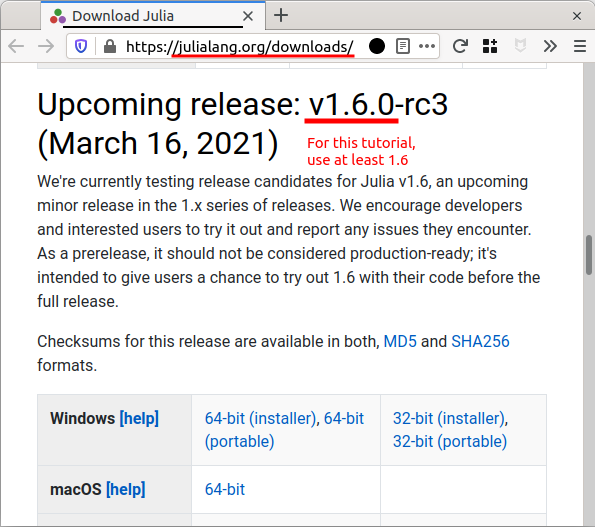

Julia on its own is just the command line executable `julia` and it does not include graphical code editors and debuggers. However, unlike e.g. `python`, `julia` includes its own project management and package installation tools.

To install `julia`, go to [julialang.org/downloads/](https://julialang.org/downloads/) and get version 1.6 or newer.

The [official documentation](https://docs.julialang.org) is a good starting point.

#### See also:

- Performance tips https://docs.julialang.org/en/v1/manual/performance-tips/
- Workflow tips https://docs.julialang.org/en/v1/manual/workflow-tips/
- Style guide https://docs.julialang.org/en/v1/manual/style-guide/
- Frequently asked questions https://docs.julialang.org/en/v1/manual/faq/
- Noteworthy differences from other languages https://docs.julialang.org/en/v1/manual/noteworthy-differences/

# Project Managment

(i.e., what `python` calls virtual environments)

It is helpful to have a clear separation between your computer system, as it is used day-to-day, and the scientific software installed on that system. For different scientific projects you might need different version of a library or a tool, and they can frequently start conflicting with each other. Julia is specifically designed to avoid these "project management" problems.


## Python case study

A frequent problem with `python` for science is to have had installed it in multiple ways: with `Anaconda`, with `homebrew`, with an installer downloaded from `python.org`, the one preinstalled with your OS, etc, and all these versions start fighting with each other and all the special libraries get downloaded and become accessible only to some of these installations.

In `python` this problem is adressed by always using `virtenv` and `pip` to track projects and install packages per project (or equivalently, with `anaconda` or whatever is the fashionable tool this year).

## Starting a Julia project

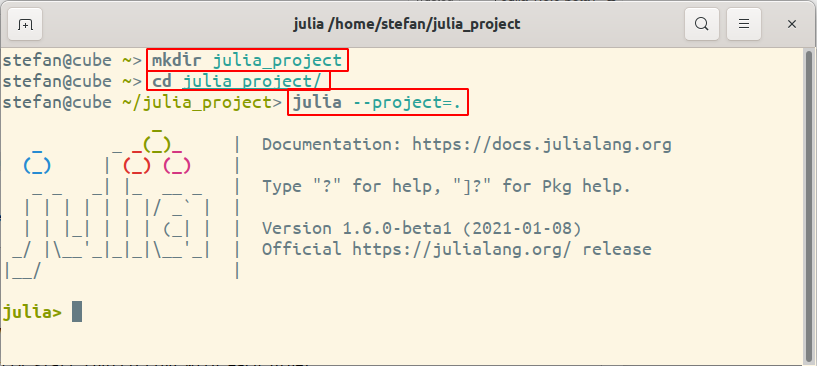

After you have downloaded and installed `julia`, you should be able to invoke it from the command line. Either by simply typing `julia` or by typing the entire path to the executable like `/home/stefan/bin/julia`. To start a `julia` project with library installs dedicated to that one single project, without worrying about any extra libraries interfering with your system and breaking other projects, do the following:

- Create a folder for your project;
- Go to that folder;
- Start `julia` with the extra flag `julia --project=.` (the dot `.` means "current directory"; it can just as well be some other directory name, if that is where you want the project to live);
- You will notice that a `Project.toml` and `Manifest.toml` files were created; They store the information about which packages were installed and made available for this project (the actual code for these packages is downloaded elsewhere, and can be chared between projects).

#### See also:

- [What’s the use a Project.toml file and the the use of a Manifest.toml in a Julia project?](https://discourse.julialang.org/t/whats-the-use-a-project-toml-file-and-the-the-use-of-a-manifest-toml-in-a-julia-project/22524)
- [Pkg documentation on `toml` files](https://pkgdocs.julialang.org/v1/toml-files/)
- Note that the `Project.toml` file can evolve from a simple list of what packages you need for a given project, to a complete description of a new library (if your project evolves to become a package/library of its own)

## Installing packages/libraries in the project

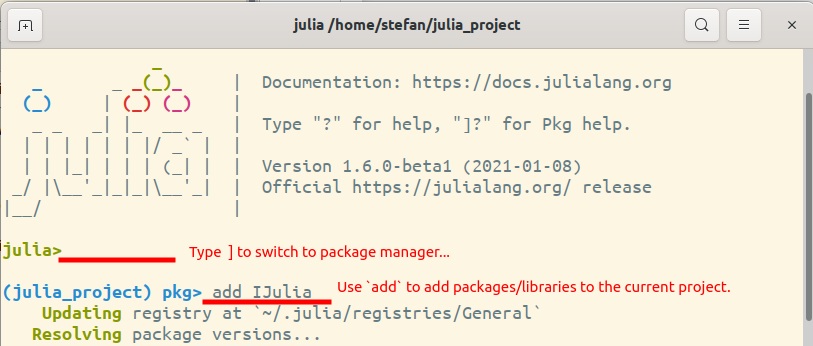

Julia has a built-in package manager. Just type the `]` character (closing square bracket) and the package manager will turn on. To install a package use `add PackageName`, to uninstall use `remove`, and to see the status of the installed packages use `status`. If you want to start a new project based on a `Project.toml` that already exists, just type `instantiate` and all of the libraries mentioned in the `Project.toml` file will be downloaded.

#### See also:

- [Intro Pkg documentation](https://pkgdocs.julialang.org/v1/getting-started/)

# Programming Tools

## Jupyter (using the IJulia kernel)

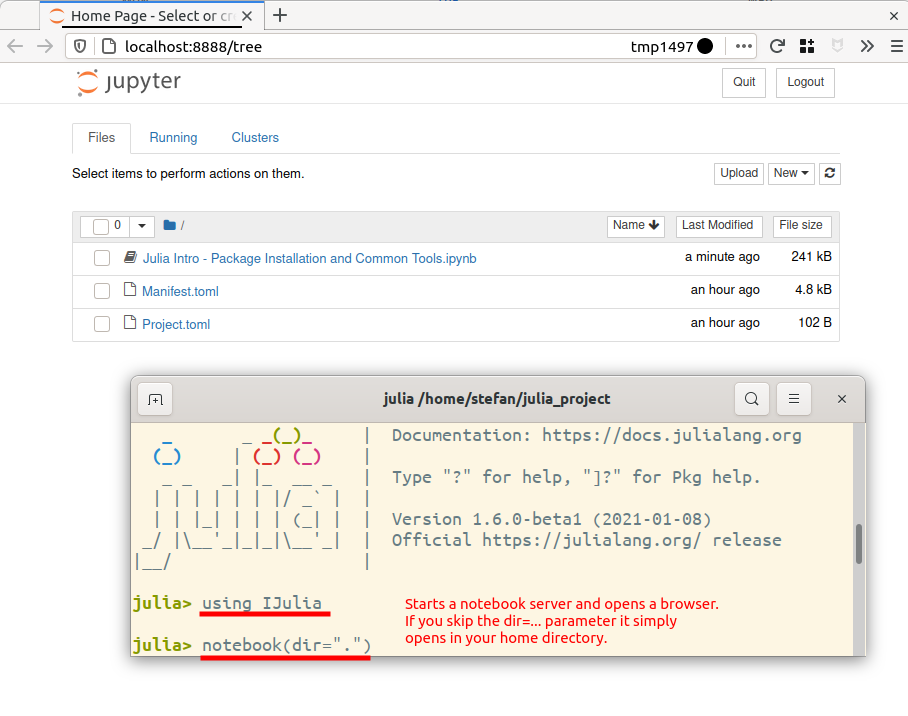

To install `IJulia` run `] add IJulia`. Then use `notebook()` to start the notebook server. If there are problems, especially due to misbehaving `python` which is required for the `jupyter` server, you can instruct `IJulia` to download its own version of `python`. Set the following global variables to empty strin: `ENV["PYTHON"]=""` and `ENV["JUPYTER"]=""` and then rerun the install of `IJulia` with `] build IJulia`.

## VSCode (using the Julia plugin)

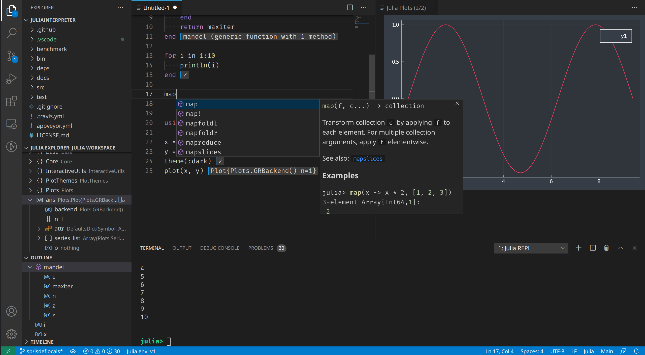

It is particularly convenient to open different projects in different windows in `VSCode`. Use `File → New Window` and then `File → Open Folder` to open the project folder (the one containing `Project.toml`). Then you can turn a built-in Julia terminal by typing the command `Ctrl+Shift+P` (in order to turn the command menu) and `Start REPL`. This would create a `julia` process as if you used `julia --project=.` in the given directory. There are many customizable hotkeys for similar tasks.

#### See also: 

- [Home page julia-vscode.org](https://www.julia-vscode.org/)
- [How to execute snippets of code](https://www.julia-vscode.org/docs/stable/userguide/runningcode/)
- Unlike in Jupyter, there are no cells. Typically you would use `Alt+Enter` to run the current self-contained piece of code.

## Atom (using the Juno plugin)

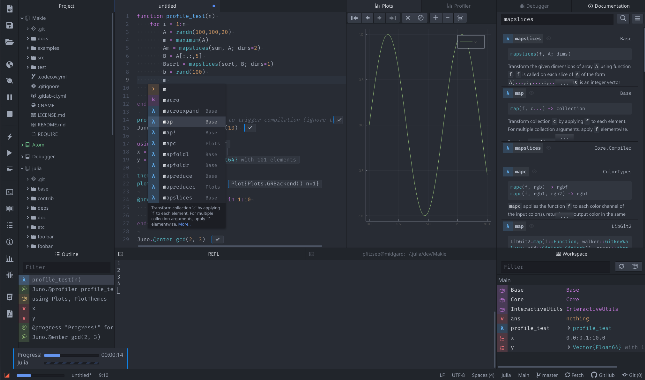

In the file browser of Atom, you can select a folder and right-click on it in order to activate it as current work environment. This is the same as using the `--project=directory` parameter when starting Julia.

#### See also:

- [Home page junolab.org](https://junolab.org/)
- Atom and VSCode are both related to Microsoft, and lately it seems Microsoft plans to support mainly VSCode in the future.

# Minimal Required Syntax Knowledge

- 1-based array indexing
- fancy indexing
- `start:step:stop` range constructors
- `end` delineated blocks
- support for unicode
- characters are surrounded by single quotes
- strings are surrounded by double quotes
- superb macro system (not discussed)
- symbols and strings are separate (not discussed)
- See also: [The Julia manual](https://docs.julialang.org/en/v1/)

## Branching and looping

See also: [the manual on control flow](https://docs.julialang.org/en/v1/manual/control-flow/)

In [ ]:
a = rand()
if a>5
    println(a, " is bigger than 5")
elseif a<0
    println(a, " is smaller than 0")
else
    println(a, " is between 0 and 5")
end

In [ ]:
for i in 1:5
    println(i)
end

## Functions

See also: [the manual on functions](https://docs.julialang.org/en/v1/manual/functions/)

In [ ]:
function f1(a) # General purpose
    return a*2
end

f2(x) = 4*x # Equivalent notation, particularly convenient for mathematical functions

f3 = arg -> arg*6 # anonymous, i.e., lambda functions; convinient for use in expressions like `map`

f1(1), f2(1), f3(1)

### Keyword parameters with default values

In [ ]:
function g1(a; keyword_param=true, another_parameter=nothing)
    println("keyword_param is ", keyword_param)
    println("another_parameter is ", another_parameter)
    return a
end

In [ ]:
g1(3)

In [ ]:
g1(4, another_parameter="lalala")

## Arrays

- Fancy indexing
- Arbitrary dimensions
- Actual fast arrays (e.g. `numpy`), not slow linked lists (e.g. `python list`)
- Column-major packing (not discussed)
- Broadcasted operations
  - **All** Julia functions are broadcastable
- See also: [the manual on arrays](https://docs.julialang.org/en/v1/manual/arrays/)

### Creating arrays

#### Random arrays

In [ ]:
rand(4,4)

In [ ]:
rand(Int, 4, 4)

In [ ]:
rand(1:10, 4, 4)

#### Zero-filled or one-filled

In [ ]:
zeros(Float64, 4, 4)

In [ ]:
ones(Float64, 4, 4)

#### Literals

In [ ]:
[1,2,3]

In [ ]:
[1 2 3]

In [ ]:
[1 2 3;
 4 5 6]

### Comprehensions

A quick and dirty way to write down mappings over an array, similar to standard set notation:

$\left\{2x \mid x\in\mathbb{Z} \right\}$

In [ ]:
[x^2 for x in [1,2,3]]

### Indexing

See also: [`python numpy` fancy indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html) for comparison

In [ ]:
# Single element indexing
[1,2,3,4,5,6][3], [1,2,3,4,5,6][end-1]

In [ ]:
# Indexing ranges
[1,2,3,4,5,6][2:end-3]

In [ ]:
# Skip every 2nd element
[1,2,3,4,5,6][1:2:end]

In [ ]:
# Multidimensional indexing
a = [  1   2   3;
      10  20  30;
     100 200 300;]

# Single element
a[2,1]

In [ ]:
# Whole column or row
a[2,:]

In [ ]:
a[:,1]

In [ ]:
# Specific non-contiguous elements
a[[1,3],:]

In [ ]:
# Bit mask
a[[true,false,true],:]

### Views

See [documentation on views](https://docs.julialang.org/en/v1/base/arrays/#Views-(SubArrays-and-other-view-types))

In [ ]:
a = rand(10,50000)

# Indexing makes a copy by default
@time a[2,:];

In [ ]:
# Views are "indirection" objects
# that just store pointers to the original array
# without making a copy.
@time (@view a[2,:]);

### Broadcasting

See [documentation on "dot" syntax](https://docs.julialang.org/en/v1/manual/functions/#man-vectorized)

In [ ]:
a = [  1   2   3;
      10  20  30;
     100 200 300;]

# Matrix multiplication
a * a

In [ ]:
# Element-wise multiplication
a .* a

In [ ]:
# This performs function applimation to the matrix
# (by diagonalization or Taylor expansion, etc.)
sin(a)

In [ ]:
# This performs element-wise application
sin.(a)

In [ ]:
# Broadcasting works with custom functions
# and is still fast.
f(x) = x^2

# Matrix (linear algebra) application
f(a)

In [ ]:
# Elementwise
f.(a)

### Special array-like lazy objects

In [ ]:
# Let us make a big array for testing
a = rand(5000,5000)

In [ ]:
# How long does it take to get the transpose
@time a'

In [ ]:
# And if we do not want to be "lazy", we can "actualize" the array
@time collect(a')

In [ ]:
a*a' ≈ a*collect(a')

In [ ]:
typeof(a), typeof(a')

### A lot of special optimized array-like objects are available

Diagonal, Triangular, Block, Sparse, etc. matrices.

See also: [LinearAlgebra documentation](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Special-matrices)

In [ ]:
using LinearAlgebra

# A general identity operator
I

In [ ]:
1.0*I

In [ ]:
@time I*a

In [ ]:
I(5000)

In [ ]:
@time I(5000)*a

In [ ]:
collected_I = collect(1.0*I(5000))
a = rand(5000,5000)
@time collected_I*a

## Unicode

You can use unicode characters in your code, including as operators. Usually they are entered by backslash `\` followed by $\LaTeX$-ish string.

See also: [the manual on unicode](https://docs.julialang.org/en/v1/manual/unicode-input/), including list of character shortcuts

In [ ]:
⊗ = kron
ℋ₀ = rand(3,3)
ℋ₀ ⊗ ℋ₀

# Fast and Slow in Julia

Julia is a compiled language, but the code is compiled function by function, instead of complete compilation ahead of time. This is... interesting.

#### See also:

- [Performance tips](https://docs.julialang.org/en/v1/manual/performance-tips/)
- [Profiling](https://docs.julialang.org/en/v1/manual/profile/)
- [Benchmark Tools](https://github.com/JuliaCI/BenchmarkTools.jl/blob/master/doc/manual.md#introduction)

In [ ]:
# Imports can be slow, especially if the library has never been compiled before
@time using Plots


In [ ]:
# The first time we call a function it has to be compiled
@time plot(rand(10), rand(10))

In [ ]:
# The second time we call that function, it would be much faster
@time plot(rand(10), rand(10))

## Indexing is fast in Julia

In `python` you have to write vectorized numpy code to be fast.

In `julia` you can, but you do not have to.

In [ ]:
using BenchmarkTools

a = rand(100000) # Make an array for testing

f_broadcast(a) = a .^ 2

f_comprehension(a) = [element^2 for element in a]

f_map(a) = map(x->x^2, a)

function f_loop(a)
    new_a = zero(a)
    for i in eachindex(a)
        new_a[i] = a[i]^2
    end
    return new_a
end

function f_loop_decorated(a)
    new_a = zero(a)
    @inbounds @simd for i in eachindex(a) # Tell the compiler that this is
        new_a[i] = a[i]^2                 # an operation that should be 
    end                                   # vectorizable and that 
    return new_a                          # it can skip checking array bounds.
end;

In [ ]:
@btime f_broadcast(a);

In [ ]:
@btime f_comprehension(a);

In [ ]:
@btime f_map(a);

In [ ]:
@btime f_loop(a);

In [ ]:
@btime f_loop_decorated(a);